In [1]:
import numpy as np
from numpy import genfromtxt

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def softmax(x):
    x = x
    e_x = np.exp(x-np.max(x))
    return e_x / e_x.sum()

def test_loss(x_in, y_in, weights1, weights2, biases1, biases2):
        out2 = pred_out(x_in, y_in, weights1, weights2, biases1, biases2)
        loss = []
        for iter in range(out2.shape[1]):
            loss.append(MSE(out2[:, iter], y_in[:, iter]))
        return np.mean(loss)

def pred_out(x_in, y_in, weights1, weights2, biases1, biases2):
        out1_temp = np.matmul(weights1.T, x_in[:,:])+biases1
        out1 = sigmoid(out1_temp)
        out2_temp = np.matmul(weights2.T, out1)+biases2
        out2 = (out2_temp)
        return out2

def acc_out(x_in, y_in, weights1, weights2, biases1, biases2):
    pred = pred_out(x_in, y_in, weights1, weights2, biases1, biases2)
    sum_acc = 0
    for iter in range(pred.shape[1]):
#         print(iter)
        sum_acc+=(np.argmax(pred[:, iter])==np.argmax(y_in[:, iter]))
    return sum_acc/y_in.shape[1]

def MSE(yHat, y):
    return np.sum(np.multiply(yHat - y, yHat - y)) / y.size

def cross_entropy(predictions, targets, epsilon=1e-5):
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    ce = - np.mean(np.multiply(np.log(predictions),targets)) 
    return ce

In [3]:
##Load and segregate the data
letters = genfromtxt('energy_eff2.csv', delimiter=',')
# np.random.shuffle(letters)
print(letters.shape)
x_in = letters[:, 0:8]
x_mean = np.mean(x_in, axis = 0)
x_std = np.std(x_in, axis = 0)
y_in = letters[:, 8:10]
y_mean = np.mean(y_in, axis=0)
y_std = np.std(y_in, axis = 0)
# y_in = (y_in-y_mean)/y_std
x_in = (x_in-x_mean)/x_std
# print(np.std(y_in, axis=0))

(768, 10)


In [4]:
x_train = x_in[0:int(x_in.shape[0]*0.7), :]
y_train = y_in[0:int(x_in.shape[0]*0.7), :]

x_test = x_in[int(x_in.shape[0]*0.7):x_in.shape[0], :]
y_test = y_in[int(x_in.shape[0]*0.7):x_in.shape[0], :]

In [5]:
hidden_size = 10
learning_rate = 0.001
num_epochs = 1000
alpha = 0.9

weights1 = np.random.normal(size=(x_in.shape[1], hidden_size))
weights2 = np.random.normal(size=(hidden_size, y_in.shape[1]))
print(weights1.shape)
print(weights2.shape)
biases1 = np.random.normal(size=(hidden_size, 1))
biases2 = np.random.normal(size=(y_in.shape[1], 1))

x_train = np.matrix(x_train)
x_train = x_train.T
y_train = np.matrix(y_train)
y_train = y_train.T

x_test = np.matrix(x_test)
x_test = x_test.T
y_test = np.matrix(y_test)
y_test = y_test.T

(8, 10)
(10, 2)


In [6]:
accuracies_train = []
accuracies_test = []
losses = []
test_losses = []

biases1_momentum = 0
biases2_momentum = 0
weights1_momentum = 0
weights2_momentum = 0

for epoch_num in range(num_epochs):
    if epoch_num%5==1:
        print("test_loss : ", test_losses[-1])
        print("train_loss : ", losses[-1])
        print("epoch_num : ", epoch_num)
    for sample_num in range(x_train.shape[1]):
#         print("sample_num : ", sample_num)
        #Forward propagation
        out1_temp = np.matmul(weights1.T, x_train[:,sample_num])+biases1
        out1 = sigmoid(out1_temp)
        out2_temp = np.matmul(weights2.T, out1)+biases2
        out2 = (out2_temp)
        #Back-propogation
        error_out = out2-y_train[:, sample_num]
        err_2 = np.matrix(error_out)
        grad_2 = np.matmul(out1, err_2.T)
        err_1 = np.multiply(np.matmul(weights2, err_2), np.multiply(out1, np.ones(out1.shape)-out1))
        grad_1 = np.multiply(x_train[:, sample_num], err_1.T)
        #Updating the weights
        
        biases1_momentum = alpha*biases1_momentum-learning_rate*err_1
        biases2_momentum = alpha*biases2_momentum-learning_rate*err_2
        weights1_momentum = alpha*weights1_momentum-learning_rate*grad_1
        weights2_momentum = alpha*weights2_momentum-learning_rate*grad_2
        
        biases1 = biases1 + biases1_momentum
        biases2 = biases2 + biases2_momentum
        weights1 = weights1 + weights1_momentum
        weights2 = weights2 + weights2_momentum
        #Updating the accuracy and loss
        #End of for loop
#     print("accuracy : ", np.mean(acc_arr))
    test_losses.append(test_loss(x_test, y_test, weights1, weights2, biases1, biases2))
#     accuracies_test.append(acc_out(x_test, y_test, weights1, weights2, biases1, biases2))
#     accuracies_train.append(acc_out(x_train, y_train, weights1, weights2, biases1, biases2))
    losses.append(test_loss(x_train, y_train, weights1, weights2, biases1, biases2))
    

test_loss :  11.525572944785932
train_loss :  9.682561978763081
epoch_num :  1
test_loss :  5.603395091513469
train_loss :  4.552989788383027
epoch_num :  6
test_loss :  4.147131632611515
train_loss :  3.2128004520437154
epoch_num :  11
test_loss :  3.5140369414047137
train_loss :  2.6850411543002832
epoch_num :  16
test_loss :  3.0598970372729486
train_loss :  2.345251757958317
epoch_num :  21
test_loss :  2.658561139536114
train_loss :  2.0825461681492325
epoch_num :  26
test_loss :  2.4422804826123543
train_loss :  1.9660107509354567
epoch_num :  31
test_loss :  2.3372061825954975
train_loss :  1.9126698583534865
epoch_num :  36
test_loss :  2.2778509827566045
train_loss :  1.8823145215462882
epoch_num :  41
test_loss :  2.2380651846631117
train_loss :  1.8604221351747805
epoch_num :  46
test_loss :  2.2099088431349387
train_loss :  1.8407879333304238
epoch_num :  51
test_loss :  2.189988566654446
train_loss :  1.8221336659370195
epoch_num :  56
test_loss :  2.1758971484207623
train

test_loss :  2.1044421160076343
train_loss :  1.603492728191179
epoch_num :  511
test_loss :  2.104707048002531
train_loss :  1.6032706810940096
epoch_num :  516
test_loss :  2.1049617896013766
train_loss :  1.6030405887228754
epoch_num :  521
test_loss :  2.105206956962333
train_loss :  1.6028026757577751
epoch_num :  526
test_loss :  2.1054431286177264
train_loss :  1.6025571690265468
epoch_num :  531
test_loss :  2.1056708228821446
train_loss :  1.6023042903878566
epoch_num :  536
test_loss :  2.105890477172845
train_loss :  1.6020442490989537
epoch_num :  541
test_loss :  2.1061024309091527
train_loss :  1.6017772339739182
epoch_num :  546
test_loss :  2.106306913278131
train_loss :  1.6015034056719895
epoch_num :  551
test_loss :  2.106504036589604
train_loss :  1.601222889446798
epoch_num :  556
test_loss :  2.1066937952882796
train_loss :  1.600935768638369
epoch_num :  561
test_loss :  2.1068760700542457
train_loss :  1.6006420791110019
epoch_num :  566
test_loss :  2.107050635

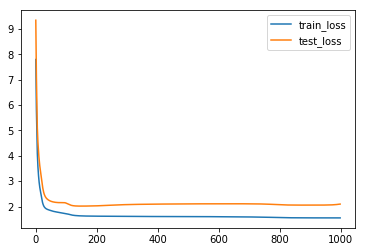

In [9]:
import matplotlib.pyplot as plt
# plt.subplot(211)
plt.plot(losses[1:], label = 'train_loss')
plt.plot(test_losses[1:], label = 'test_loss')
plt.legend()
plt.show()
# plt.subplot(212)
# plt.plot(np.multiply(pred_out(x_test, y_test, weights1, weights2, biases1, biases2)-y_test, pred_out(x_test, y_test, weights1, weights2, biases1, biases2)-y_test).T)

In [8]:
ind = 101
print(pred_out(x_test, y_test, weights1, weights2, biases1, biases2)[:,5:10])
print(y_test[:,5:10])

[[10.23178875 17.35596776 39.35655612 18.87411929 24.40337259]
 [14.25366703 24.8146826  40.92548352 21.94086636 27.17937146]]
[[11.7  19.95 38.57 19.36 24.29]
 [13.88 21.97 43.86 22.73 25.95]]


In [10]:
print(losses[-1])

1.551452353596725
